# Fourier Formalism

The Fourier formalism is described by [Marsh et al 2022](https://ui.adsabs.harvard.edu/abs/2021arXiv210708040M/abstract) and in this documentation.

ALPro includes a _numerical_ implementation, as described in section 6 of [Marsh et al 2022](https://ui.adsabs.harvard.edu/abs/2021arXiv210708040M/abstract). Standard discrete cosine/sine transforms, as implemented in [scipy.fftpack](https://docs.scipy.org/doc/scipy/reference/fftpack.html), are used to obtain first-order solutions to the Schrodinger-like equation of motion for a photon-ALP beam. This notebook gives a couple of basic examples of how to use the scheme. 

<div class="alert alert-warning">
Warning: the scheme is _perturbative_ and so only accurate to first-order! For $P_{\gamma a} \gtrsim 0.1$ the calculation will give inaccurate results. 
</div>

<div class="alert alert-info">
Note: The Fourier formalism is well tested in general, but the specific numerical implementation in ALPro should at this stage be considered a beta feature. If you discover any problems, please open a Github issue. 
</div>

<div class="alert alert-warning">
Warning: one of the idiosyncrasies of the scheme is that the use of a discrete cosine transform requires regular samples in either $z$, $l$ or $\varphi$ space. As a result, it can sometimes be impossible to repdroduce exactly results from models with variable cell sizes. It is therefore recommended that you work with models that can be broken up into regular spacing grids and avoid step changes at irregular intervals. 
</div>

## Massive ALPs

This example sets up a cell model with uniform cell size and finds the conversion probability. The massless formalism is specified automatically by setting the mass to a value below the minimum $\omega_{\rm pl}$. 

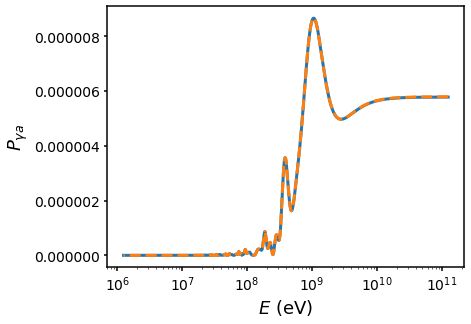

In [1]:
import alpro
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
alpro.util.set_default_plot_params()

s1 = alpro.Survival("1275b")
s1.init_model()
s1.set_params(1e-14 * 1e-9, 1e-9)
s1.set_coherence_r0(None)
s1.domain.create_box_array(100.0, 0, 10.0, r0=0)

s2 = alpro.Survival("1275b")
s2.init_model()
s2.set_params(1e-14 * 1e-9, 1e-9)
s2.set_coherence_r0(None)
s2.domain.create_box_array(100.0, 0, 10.0, r0=0)

E, P2 = s1.propagate_fourier(s1.domain, pol="both", mode="auto", N=100000, f_res = 2000)
_ = s1.default_plot()

P1, _ = s2.propagate(s2.domain, energies=E, pol="both")
_ = plt.plot(E, P1, ls="--", c="C1")

## Massless ALPs

This example sets up a cell model with uniform cell size and and finds the conversion probability. The massless formalism is specified automatically by setting the mass to a value below the minimum $\omega_{\rm pl}$. 

<div class="alert alert-warning">Warning: I've found the massless scheme implementation in ALPro to be a little less stable than the massive one. This is not surprising giving the remapping from $z\to\varphi$, but users should exercise caution, particularly at the high $E$ (low $\lambda$) end.</div> 

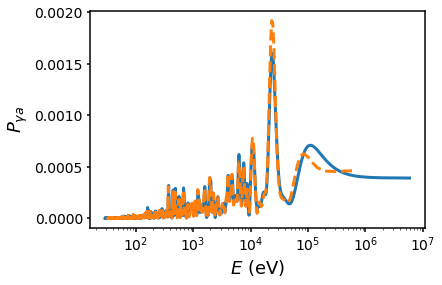

In [2]:
# set up a class for the standard calculation 
s1 = alpro.Survival("1275b")
s1.init_model()
s1.set_params(1e-13 * 1e-9, 1e-13)
s1.set_coherence_r0(None)
s1.domain.create_box_array(1800.0, 0, 10.0, r0=0)

# set up a class for the Fourier-like calculation 
s2 = alpro.Survival("1275b")
s2.init_model()
s2.set_params(1e-13 * 1e-9, 1e-13)
s2.set_coherence_r0(None)
s2.domain.create_box_array(1800.0, 0, 10.0, r0=0)

N = 200000
pad_factor = 40
f_res = N//pad_factor
E, P2 = s2.propagate_fourier(s2.domain, pol="both", mode="auto", N=N, f_res = f_res)
_ = s2.default_plot(mode="conversion")

P1, _ = s1.propagate(s1.domain, energies=E[::10], pol="both")
_ = plt.plot(s1.energies, P1, ls="--", c="C1")

The Fourier scheme can be used for many more types of models and the code can also be used to inspect autocorrelation functions and so on. I will endeavour to include more detail here in time. 